In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

C:\Users\WITHJS\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy
import sys
import tensorflow as tf

In [3]:
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
import matplotlib.pyplot as plt

label=[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


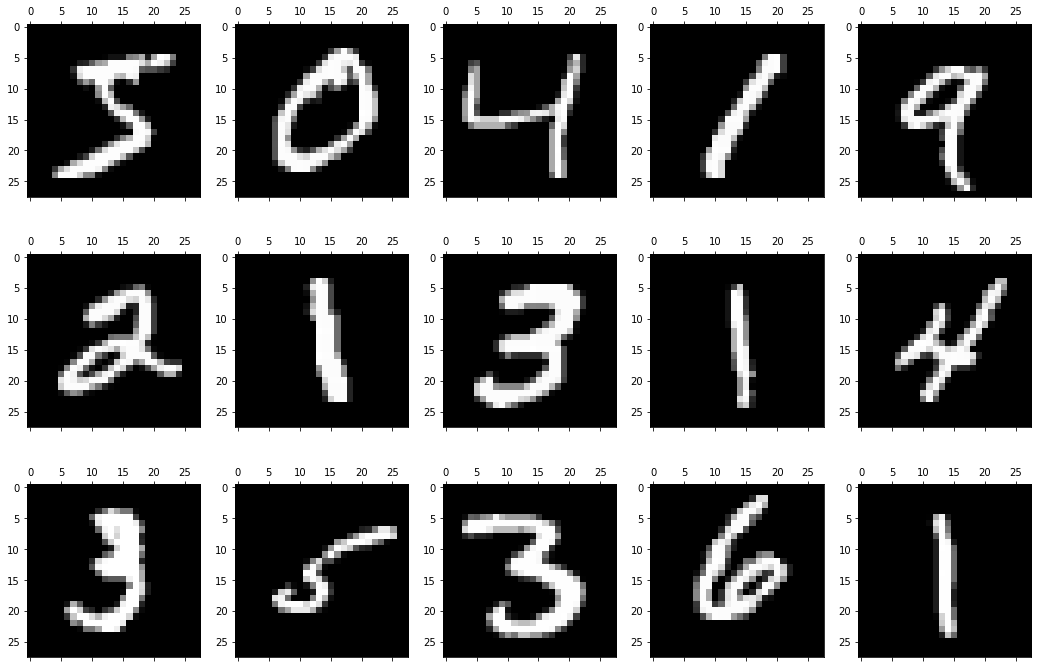

In [6]:
figure,axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18,12)

plt.gray()
print("label={}".format(Y_train[0:15]))

col = 0
for row in range(0,3):
    col = row * 5
    axes[row][0].matshow(X_train[col])
    axes[row][1].matshow(X_train[col+1])
    axes[row][2].matshow(X_train[col+2])
    axes[row][3].matshow(X_train[col+3])
    axes[row][4].matshow(X_train[col+4])

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
X_train = X_train.reshape(X_train.shape[0],784)
X_train.astype('float64')
X_train = X_train/255

In [9]:
X_train.shape

(60000, 784)

In [10]:
X_test = X_test.reshape(X_test.shape[0],784)
X_test.astype('float64')
X_test = X_test/255

In [11]:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

In [12]:

print(Y_train[0:4])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [13]:
### 딥러닝 프레임 만들기 - 인공신경망

In [14]:
from keras.models import Sequential
from keras.layers import Dense

In [15]:
m = Sequential()

In [16]:
m.add(Dense(512,input_dim=784, activation='relu'))
m.add(Dense(10,activation='softmax'))#softmax

In [17]:
###오차함수 :categorical_crossentropy, 최적화 함수 : adam

In [18]:
m.compile(loss="categorical_crossentropy", 
         optimizer='adam',
         metrics=['accuracy'])

In [19]:
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping
MODEL_DIR = './model/' 

if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor='val_loss', 
                               verbose=1, save_best_only=True) 

#10회 이상 성능향상이 없다면 중단하라

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)



In [20]:
###샘플 200, 모두 30번 실행,
history = m.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                epochs=30,
                batch_size=200,
                verbose=0,
                callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.15484, saving model to ./model/01-0.1548.hdf5

Epoch 00002: val_loss improved from 0.15484 to 0.10481, saving model to ./model/02-0.1048.hdf5

Epoch 00003: val_loss improved from 0.10481 to 0.08377, saving model to ./model/03-0.0838.hdf5

Epoch 00004: val_loss improved from 0.08377 to 0.07864, saving model to ./model/04-0.0786.hdf5

Epoch 00005: val_loss improved from 0.07864 to 0.06683, saving model to ./model/05-0.0668.hdf5

Epoch 00006: val_loss improved from 0.06683 to 0.06467, saving model to ./model/06-0.0647.hdf5

Epoch 00007: val_loss did not improve from 0.06467

Epoch 00008: val_loss improved from 0.06467 to 0.06343, saving model to ./model/08-0.0634.hdf5

Epoch 00009: val_loss improved from 0.06343 to 0.05755, saving model to ./model/09-0.0576.hdf5

Epoch 00010: val_loss did not improve from 0.05755

Epoch 00011: val_loss did not improve from 0.05755

Epoch 00012: val_loss did not improve from 0.05755

Epoch 00013: val_loss did n

In [21]:
print("Test Accuracy : %.4f" %(m.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 1s 140us/step
Test Accuracy : 0.9818


In [25]:
pred = m.predict(X_test)

In [29]:
pred.shape

(10000, 10)

In [30]:
pred[1]

array([9.0946348e-12, 3.5892302e-07, 9.9999964e-01, 1.6101660e-11,
       1.5327031e-21, 8.7890480e-13, 9.1209011e-12, 1.0068719e-20,
       9.5029884e-10, 5.9436722e-19], dtype=float32)

TypeError: Invalid dimensions for image data

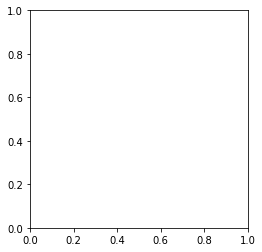